In [ ]:
from google.colab import drive
drive.mount('/gdrive6')  #Mount your drive

Drive already mounted at /gdrive6; to attempt to forcibly remount, call drive.mount("/gdrive6", force_remount=True).


In [ ]:
cd '/gdrive6/My Drive/Colab Notebooks/emojify/'

/gdrive6/My Drive/Colab Notebooks/emojify


<h1> Emojify! </h1>

<h2> Input: where is the food </h2>

<h2> Output: where is the food 🍴</h2>

<br>

<hr>
<hr>

<br>

<p> 1. We'll use the <b>emoji</b> package to help display emoticons.</p>

In [ ]:
!pip3 install emoji


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<br>

<p> 2. Import relevant libraries. The <b>emo_utils</b> library has some useful functions for this exercise, such as mapping integers to emoticons. </p>

In [ ]:
import os
import numpy as np
import pandas as pd
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision

%matplotlib inline


ModuleNotFoundError: ignored

<br>

<p> 3. Using <b>label_to_emoji(idx)</b> to map integers to emoticons. </p>

In [ ]:

for idx in range(5):
    print(idx,'\t',label_to_emoji(idx),'\n')
    

0 	 ❤️ 

1 	 ⚾ 

2 	 😄 

3 	 :disappointed: 

4 	 🍴 



<br>

<p> 4. <b>train.csv</b> contains some training sentences. </p>

In [ ]:
train_data = np.array(pd.read_csv('train.csv', header=None, index_col=False))
print(train_data.shape,'\n')

X_train, Y_train = train_data[:,0], train_data[:,1]
Y_train = np.array(Y_train, dtype=int)

for idx in range(10):
    print(X_train[idx], Y_train[idx], label_to_emoji(Y_train[idx]))


(132, 2) 

never talk to me again 3 :disappointed:
I am proud of your achievements 2 😄
It is the worst day in my life 3 :disappointed:
Miss you so much 0 ❤️
food is life 4 🍴
I love you mum 0 ❤️
Stop saying bullshit 3 :disappointed:
congratulations on your acceptance 2 😄
The assignment is too long 3 :disappointed:
I want to go play 1 ⚾


<br>

<p> 5. <b>test.csv</b> contains some test sentences. </p>

In [ ]:
test_data = np.array(pd.read_csv('test.csv', header=None, index_col=False))
print(test_data.shape)

X_test, Y_test = test_data[:,0], test_data[:,1]
Y_test = np.array(Y_test, dtype=int)

for idx in range(10):
    print(X_test[idx], Y_test[idx], label_to_emoji(Y_test[idx]))


(56, 2)
I want to eat 4 🍴
he did not answer 3 :disappointed:
he got a very nice raise 2 😄
she got me a nice present 2 😄
ha ha ha it was so funny 2 😄
he is a good friend 2 😄
I am upset 3 :disappointed:
We had such a lovely dinner tonight 2 😄
where is the food 4 🍴
Stop making this joke ha ha ha 2 😄


<br>

<hr>

<br>

6. <b>glove.6B.50d.txt</b> contains 50-dimensional GloVe (https://nlp.stanford.edu/projects/glove/) (Global Vectors for Word Representation) embeddings for some common english words.

In [ ]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')


<br>

<p> 7. An example of mapping a word to its unique index, and obtaining its GloVe embedding. </p>

In [ ]:
word = "cucumber"
print("the index of", word, "in the vocabulary is:", word_to_index[word],'\n')
print('GloVe of', word, "is:\n", word_to_vec_map[word])

index = 289845
print("\nthe", str(index) + "th word in the vocabulary is", index_to_word[index])


the index of cucumber in the vocabulary is: 113317 

GloVe of cucumber is:
 [ 0.68224  -0.31608  -0.95201   0.47108   0.56571   0.13151   0.22457
  0.094995 -1.3237   -0.51545  -0.39337   0.88488   0.93826   0.22931
  0.088624 -0.53908   0.23396   0.73245  -0.019123 -0.26552  -0.40433
 -1.5832    1.1316    0.4419   -0.48218   0.4828    0.14938   1.1245
  1.0159   -0.50213   0.83831  -0.31303   0.083242  1.7161    0.15024
  1.0324   -1.5005    0.62348   0.54508  -0.88484   0.53279  -0.085119
  0.02141  -0.56629   1.1463    0.6464    0.78318  -0.067662  0.22884
 -0.042453]

the 289845th word in the vocabulary is potatoes


<br>

<p> 8. Create a dataset to train in PyTorch. </p>

In [ ]:
def sentences_to_indices(X, word_to_index, max_len):
    m = X.shape[0]
    X_indices = np.zeros((m, max_len))
    for i in range(m):
        sentence_words = X[i].lower().split()
        j = 0
        for w in sentence_words:
            X_indices[i, j] = int(word_to_index[w])
            j = j + 1
    return X_indices


class emojiDataset(Data.Dataset):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        self.root = root
        self.transform = transform
        self.target_transform = target_transform
        self.train = train
        traindata,trainlabels = read_csv(os.path.join(self.root,'train.csv'))
        self.train_data = sentences_to_indices(traindata, word_to_index, 10)
        self.train_labels = trainlabels
        # self.train_labels = convert_to_one_hot(trainlabels, C=5)
    def __getitem__(self, index):
        if self.train:
            data, target = self.train_data[index], self.train_labels[index]
        else:
            pass
        if self.transform is not None:
            pass
        if self.target_transform is not None:
            pass
        return data, target
    def __len__(self):
        if self.train:
            return 132
        else:
            return 0
        
train_data = emojiDataset(
    root='./',
)
print(train_data[0])

train_loader = Data.DataLoader(dataset=train_data, batch_size=20, shuffle=True, num_workers=0)


(array([259914., 352214., 360915., 239105.,  47887.,      0.,      0.,
            0.,      0.,      0.]), 3)


In [ ]:
for data in train_loader:
    t, l = data
    print(t.shape, l.shape)

torch.Size([20, 10]) torch.Size([20])
torch.Size([20, 10]) torch.Size([20])
torch.Size([20, 10]) torch.Size([20])
torch.Size([20, 10]) torch.Size([20])
torch.Size([20, 10]) torch.Size([20])
torch.Size([20, 10]) torch.Size([20])
torch.Size([12, 10]) torch.Size([12])


<br>

<p> 9. Create an embedding layer to obtain GloVe embeddings. </p>

In [ ]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_len = len(word_to_index) + 1  #word index begin with 1,plus 1 for padding 0
    emb_dim = word_to_vec_map["cucumber"].shape[0]
    emb_matrix = np.zeros((vocab_len, emb_dim))
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]
    return emb_matrix

emb_matrix = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print(emb_matrix.shape)


(400001, 50)


<br>

<p> 10. Define the network: </p>

<img src="img_lstm_network.png">

<p> (image source: https://github.com/Kulbear/deep-learning-coursera) </p>

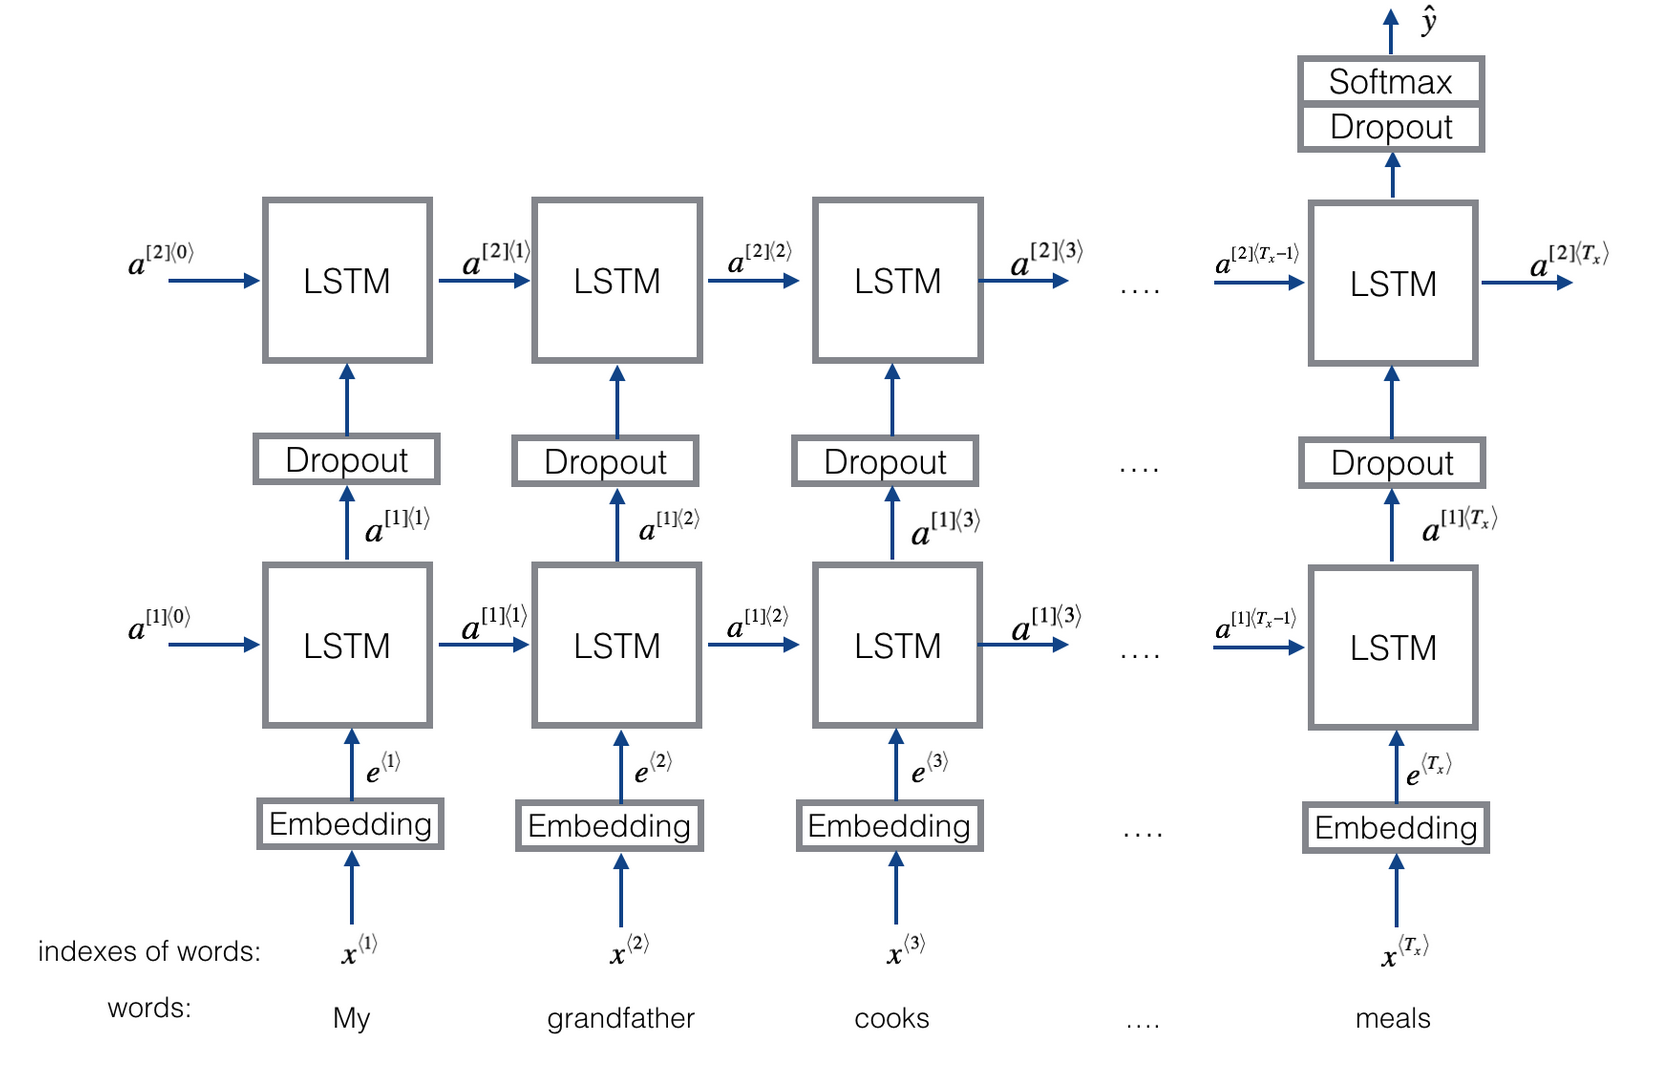

In [ ]:
rnn = nn.LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)
output = rnn(input)
print(input[0].shape)
print(output[0].shape)

torch.Size([3, 10])
torch.Size([5, 3, 20])


In [ ]:
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
output = rnn(input)
output[0].shape

torch.Size([5, 3, 20])

In [ ]:
rnn = nn.GRU(10, 20, 2)
input = torch.randn(5, 3, 10)
output = rnn(input)
output[0].shape

torch.Size([5, 3, 20])

In [ ]:
class myModel(nn.Module):
    def __init__(self,vocab_size,embedding_dim,pretrained_weight):
        super(myModel,self).__init__()
        self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        pretrained_weight = np.array(pretrained_weight)
        self.word_embeds.weight.data.copy_(torch.from_numpy(pretrained_weight))
        
        self.rnn = nn.LSTM(embedding_dim, 128, 2,batch_first=True,dropout=0.5)
        self.linear = nn.Linear(128,5)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self,x):
        out = self.word_embeds(x)
        out, _ = self.rnn(out)
        out = out[:, -1, :]
        out = self.linear(out)
        out = self.softmax(out)
        return out
    

<br>

<p> 11. Create the network: </p>

In [ ]:
vocab_len = len(word_to_index) + 1
model = myModel(vocab_len,50,emb_matrix)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


myModel(
  (word_embeds): Embedding(400001, 50)
  (rnn): LSTM(50, 128, num_layers=2, batch_first=True, dropout=0.5)
  (linear): Linear(in_features=128, out_features=5, bias=True)
  (softmax): Softmax(dim=-1)
)

<p> 12. Define the loss function and the optimizers. </p>

In [ ]:
loss_func = nn.CrossEntropyLoss()

optimizer1 = torch.optim.Adam(model.rnn.parameters(),lr=0.001)
optimizer2 = torch.optim.Adam(model.linear.parameters(),lr=0.001)


<br>

<p> 13. Start the training process.</p>

In [ ]:
for epoch in range(100):
    total_loss = 0
    for step,(data,target) in enumerate(train_loader):
        data = data.long()
        target = target.long()
        optimizer1.zero_grad()
        optimizer2.zero_grad()
        input = Variable(data).to(device)
        target = Variable(target).to(device)
        output = model(input)
        
        loss = loss_func(output,target)
        loss.backward()
        total_loss += loss.item()
        optimizer1.step()
        optimizer2.step()
        
    if epoch%10 == 0:
        print('epoch: ', epoch, 'loss:', total_loss)
        

epoch:  0 loss: 7.1874712109565735
epoch:  10 loss: 6.6372880935668945
epoch:  20 loss: 6.588050425052643
epoch:  30 loss: 6.744397282600403
epoch:  40 loss: 6.852876961231232
epoch:  50 loss: 6.5924917459487915
epoch:  60 loss: 6.606861174106598
epoch:  70 loss: 6.5374062061309814
epoch:  80 loss: 6.535646855831146
epoch:  90 loss: 6.568325638771057


<br>

<p> 14. Test the trained network. </p>

In [ ]:
X_test_indices = sentences_to_indices(X_test, word_to_index, 10)
X_test_indices = torch.from_numpy(X_test_indices)
X_test_indices = Variable(X_test_indices.long()).to(device)
pred = model(X_test_indices)
num = np.zeros((X_test.shape[0]), dtype=int)
for i in range(len(X_test)):
    num[i] = np.argmax(pred.data[i].detach().cpu().numpy())
    print(' prediction: ' + X_test[i] + label_to_emoji(num[i]).strip())
    

 prediction: I want to eat🍴
 prediction: he did not answer:disappointed:
 prediction: he got a very nice raise❤️
 prediction: she got me a nice present❤️
 prediction: ha ha ha it was so funny😄
 prediction: he is a good friend❤️
 prediction: I am upset:disappointed:
 prediction: We had such a lovely dinner tonight🍴
 prediction: where is the food🍴
 prediction: Stop making this joke ha ha ha😄
 prediction: where is the ball⚾
 prediction: work is hard:disappointed:
 prediction: This girl is messing with me❤️
 prediction: are you serious:disappointed:
 prediction: Let us go play baseball⚾
 prediction: This stupid grader is not working:disappointed:
 prediction: work is horrible:disappointed:
 prediction: Congratulation for having a baby😄
 prediction: stop pissing me off:disappointed:
 prediction: any suggestions for dinner🍴
 prediction: I love taking breaks❤️
 prediction: you brighten my day😄
 prediction: I boiled rice🍴
 prediction: she is a bully❤️
 prediction: Why are you feeling bad:disap

<br>

<p> 15. Contingency Matrix of class-wise accuracy </p>

           ❤️    ⚾    😄    :disappointed:   🍴
Predicted   0   1   2   3  4  All
Actual                           
0           4   1   0   2  0    7
1           0   8   0   0  0    8
2           4   0  12   1  1   18
3           3   0   5   8  0   16
4           0   1   1   0  5    7
All        11  10  18  11  6   56


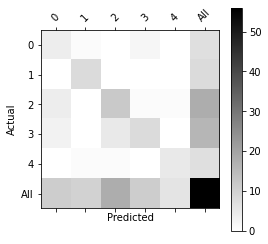

In [ ]:
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, num.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, num)

           ❤️    ⚾    😄    :disappointed:   🍴
Predicted   0  1   2   3  4  All
Actual                          
0           7  0   0   0  0    7
1           1  6   1   0  0    8
2           4  0  13   0  1   18
3           4  0   0  12  0   16
4           0  0   0   1  6    7
All        16  6  14  13  7   56


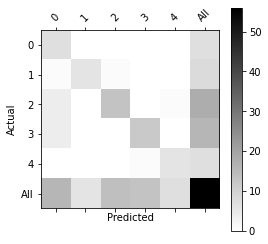

In [ ]:
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, num.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, num)

<br>

<hr>

<hr>

<br>

References:

https://github.com/Kulbear/deep-learning-coursera

https://github.com/sushantdhumak/Emojify

https://github.com/cryer/emojify-pyTorch